# Análise de Risco de Crédito

# Contexto
* ### A detecção de fraudes em cartões de crédito é uma tarefa crucial para as empresas de cartões e instituições financeiras, pois permite identificar transações fraudulentas e prevenir perdas financeiras significativas. No cenário atual, com o aumento do uso de pagamentos digitais, é vital que os sistemas consigam identificar com precisão as transações suspeitas, para que os clientes não sejam cobrados por compras que não realizaram.

* ### O dataset utilizado neste estudo contém transações de cartão de crédito realizadas por portadores de cartões europeus durante o mês de setembro de 2013. Este dataset é caracterizado por um grande desequilíbrio entre as classes: das 284.807 transações, apenas 492 são fraudulentas, o que representa apenas 0.172% do total de transações. Devido a questões de confidencialidade, o dataset contém apenas variáveis numéricas, que resultam de uma transformação PCA (Análise de Componentes Principais). Além disso, as variáveis 'Time' (tempo em segundos desde a primeira transação) e 'Amount' (valor da transação) não foram transformadas.

# Importância do Dataset e do Treinamento
* ### O dataset é de extrema importância, pois reflete transações reais e contém um número considerável de fraudes. A natureza desbalanceada das classes (fraude vs. não fraude) torna a tarefa de classificação mais desafiadora, o que exige técnicas especiais de balanceamento, como o SMOTE, para garantir que o modelo aprenda adequadamente a distinguir entre as duas classes. O treinamento do modelo é crucial para que ele consiga aprender a identificar padrões nas transações, de modo a classificar corretamente as transações como fraudulentas ou legítimas. No entanto, a avaliação deve ser feita de forma cuidadosa, pois a métrica tradicional de precisão (accuracy) pode ser enganosa em um cenário com classes desbalanceadas.

# Objetivo
* ### O objetivo deste estudo é comparar o desempenho de dois algoritmos populares para detectar fraudes em cartões de crédito: XGBoost e Random Forest. A comparação será realizada com base no AUC-ROC (Área sob a Curva ROC), com o intuito de:

    * ### 1. Avaliar a eficácia dos modelos em identificar transações fraudulentas em um cenário de dados altamente desbalanceados.
    * ### 2. Comparar o desempenho dos modelos considerando as limitações impostas pela falta de informações detalhadas no dataset.
    * ### 3. Examinar a importância das variáveis na decisão do modelo, destacando as variáveis mais relevantes para a detecção de fraudes.

# Metodologia
### A metodologia adotada envolveu os seguintes passos:

* #### Pré-processamento dos dados: O dataset foi pré-processado utilizando a técnica SMOTE (Synthetic Minority Over-sampling Technique) para balanceamento das classes (fraude e não fraude), dado o desbalanceamento significativo (0,172% de fraudes). A técnica SMOTE gerou instâncias sintéticas da classe minoritária (fraude) para equilibrar a distribuição das classes. As variáveis do dataset são todas numéricas, com exceção das variáveis 'Time' (tempo da transação) e 'Amount' (valor da transação), que foram mantidas em sua forma original.

* #### Divisão do dataset: O dataset foi dividido em três partes: **80% para treinamento**, com o restante dividido igualmente entre **validação (10%)** e **teste (10%)**. A divisão foi feita de forma aleatória, com embaralhamento dos dados para garantir representatividade das diferentes classes em cada conjunto.

* #### Treinamento e Avaliação: Os modelos XGBoost e Random Forest foram treinados com os dados de treinamento e avaliados utilizando a métrica AUC-ROC (Área Sob a Curva ROC). A AUC-ROC foi escolhida como a principal métrica de desempenho devido à sua capacidade de lidar com datasets desbalanceados, pois ela considera tanto a taxa de verdadeiros positivos (TPR) quanto a taxa de falsos positivos (FPR).

* #### Métricas de Avaliação: A principal métrica utilizada foi a AUC-ROC, que avalia a habilidade dos modelos em classificar corretamente as transações fraudulentas em comparação com as transações legítimas, considerando diferentes limiares de classificação.

# Perguntas a Serem Respondidas
* ### Qual modelo, entre XGBoost e Random Forest, apresenta o melhor desempenho na detecção de fraudes em cartões de crédito?
* ### Como as variáveis 'Time' e 'Amount' influenciam as previsões do modelo, considerando que a maioria das variáveis foi gerada a partir de uma transformação PCA?
* ### Quais são as variáveis mais importantes para a detecção de fraudes, com base na análise de feature importance?

# Resultados
* ### O XGBoost obteve um AUC-ROC Score de 0.9704, destacando-se por sua alta capacidade de identificar fraudes. Este resultado reflete o excelente desempenho do modelo em separar as classes de fraude e não fraude, minimizando falsos positivos e falsos negativos.
* ### O Random Forest apresentou um AUC-ROC Score de 0.9068, um desempenho inferior ao XGBoost, mas ainda eficiente para a identificação de fraudes. Isso demonstra que, embora o modelo seja menos preciso, ele pode ser útil em cenários onde simplicidade ou interpretabilidade sejam mais importantes.

# Conclusões
* ### Os resultados confirmam o XGBoost como o modelo mais eficaz para detectar fraudes em cartões de crédito, superando o Random Forest em desempenho. As variáveis V14, V12 e outras componentes principais mostraram forte associação com transações fraudulentas, enquanto 'Amount' e 'Time' tiveram impacto reduzido. Esses achados podem guiar melhorias em sistemas de detecção focados nas características mais relevantes.
* ### Esses insights são valiosos para o aprimoramento de sistemas de detecção, permitindo que as empresas financeiras concentrem seus esforços em características mais significativas para verificar transações suspeitas.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.model_selection import KFold

In [136]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

---
## Observação das classes desbalanceadas

In [138]:
df['Class'].value_counts()
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [139]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


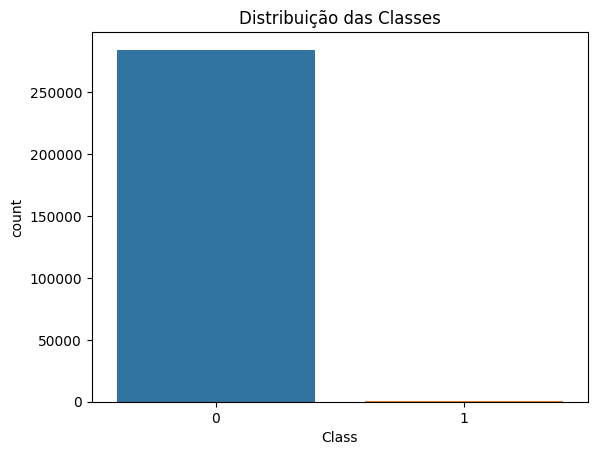

In [140]:
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes')
plt.show()


---
## Separando o conjunto para treino e teste

### Separação de Features e Labels:
* X contém as variáveis independentes (todas as colunas, exceto Class).
* y contém a variável alvo (Class), que é o que queremos prever.

### Divisão dos Dados:
* A primeira divisão separa 80% dos dados para treino e 20% para um conjunto temporário.
* A segunda divisão divide o conjunto temporário em validação (10%) e teste (10%).

### Distribuição das Classes:
* A função Counter mostra como as classes estão distribuídas nos conjuntos, verificando se a proporção original foi mantida.

In [141]:
from collections import Counter

# Separar features e labels
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Verificar a distribuição original
print('Distribuição original (treino):', Counter(y_train))
print('Distribuição original (validação):', Counter(y_valid))
print('Distribuição original (teste):', Counter(y_test))


Distribuição original (treino): Counter({0: 227451, 1: 394})
Distribuição original (validação): Counter({0: 28426, 1: 55})
Distribuição original (teste): Counter({0: 28438, 1: 43})


---
# Aplicação do SMOTE:
* A técnica SMOTE é usada para criar exemplos sintéticos da classe minoritária, aumentando a quantidade de dados para equilibrar as classes. Isso ajuda a melhorar o desempenho dos modelos ao fornecer uma quantidade mais equitativa de exemplos para a classe minoritária.

## Por que não aplicar SMOTE antes de dividir os dados?
### Introdução de dados do teste no treinamento:
* Quando se aplica SMOTE antes da divisão, os dados sintéticos gerados podem acabar nos dois conjuntos (treino e teste), violando o princípio de separação entre treinamento e avaliação.
* Isso causa um vazamento de dados, onde o modelo "vê" partes dos dados do teste durante o treinamento, resultando em métricas de desempenho inflacionadas e não realistas.

### Avaliação irrealista:
* O objetivo do conjunto de teste é simular como o modelo se comportará em dados reais. Se os dados de teste forem alterados, não refletirão a distribuição verdadeira dos dados originais.
* Isso compromete a capacidade de avaliar o modelo de forma justa.


In [143]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar a nova distribuição das classes no treino
print('Distribuição após SMOTE (treino):', Counter(y_train_resampled))

d:\Ferramentas\anaconda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\Ferramentas\anaconda\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribuição após SMOTE (treino): Counter({0: 227451, 1: 227451})


---
## Modelo Random Forest

* O Random Forest é um algoritmo que combina várias árvores de decisão para melhorar a precisão e reduzir o overfitting. Ele cria várias árvores treinadas em subconjuntos aleatórios do dataset, introduzindo aleatoriedade na seleção de atributos e na amostragem dos dados. 
* Na fase de previsão, o modelo usa a votação majoritária (ou média, em regressão) para fornecer a previsão final. 
* Esse método melhora a generalização, lidando bem com dados desbalanceados e não lineares, tornando-o amplamente utilizado em tarefas de classificação e previsão, como a previsão de risco de crédito.

In [144]:
# Configuração do modelo Random Forest
rf = RandomForestClassifier(n_jobs=-1,            # Número de jobs para paralelização
                             random_state=2268,  # Semente para a aleatoriedade
                             criterion='gini',    # Critério para a qualidade de divisão
                             n_estimators=100,    # Número de árvores
                             verbose=False)       # Se mostrar ou não mensagens no treinamento

# Configuração do StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Previsões no conjunto de treino balanceado com validação cruzada
y_pred_train = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=skf, method='predict')

# Avaliar desempenho no conjunto de treino com validação cruzada
print("Relatório de classificação no conjunto de treino balanceado:")
print(classification_report(y_train_resampled, y_pred_train))

Relatório de classificação no conjunto de treino balanceado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [145]:
# Treinar o modelo no conjunto de treino balanceado completo
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=2268, verbose=False)

In [11]:
# Avaliar desempenho no conjunto de validação
y_pred_valid = rf.predict(X_valid)
print("Relatório de classificação no conjunto de validação:")
print(classification_report(y_valid, y_pred_valid))

Relatório de classificação no conjunto de validação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.92      0.87      0.90        55

    accuracy                           1.00     28481
   macro avg       0.96      0.94      0.95     28481
weighted avg       1.00      1.00      1.00     28481



In [12]:
# Avaliar desempenho no conjunto de teste
y_pred_test = rf.predict(X_test)
print("Relatório de classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_test))

Relatório de classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28438
           1       0.80      0.81      0.80        43

    accuracy                           1.00     28481
   macro avg       0.90      0.91      0.90     28481
weighted avg       1.00      1.00      1.00     28481



### Curva ROC-AUC 

* A curva ROC (Receiver Operating Characteristic) e a métrica AUC (Área sob a Curva) são usadas para avaliar o desempenho de modelos de classificação, especialmente em problemas de classificação binária.
* Curva ROC: Plota a taxa de verdadeiros positivos (TPR) contra a taxa de falsos positivos (FPR) para diferentes limiares de decisão.
* AUC (Área sob a Curva): Mede a capacidade do modelo de distinguir entre as classes de forma geral. Um AUC de 1 indica que o modelo tem desempenho perfeito, enquanto um AUC de 0.5 sugere um desempenho aleatório. quanto mais próximo de 1 for o valor da métrica AUC, melhor será o desempenho do modelo.
* Objetivo: Avaliar a qualidade dos modelos em prever os resultados corretos, especialmente quando os dados são desbalanceados. Ajuda a entender o equilíbrio entre precisão e recall em diferentes limiares de decisão.

In [13]:
# Calcular AUC para cada conjunto
train_auc = roc_auc_score(y_train_resampled, rf.predict_proba(X_train_resampled)[:, 1])
valid_auc = roc_auc_score(y_valid, rf.predict_proba(X_valid)[:, 1])
test_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"AUC no conjunto de treino: {train_auc:.4f}")
print(f"AUC no conjunto de validação: {valid_auc:.4f}")
print(f"AUC no conjunto de teste: {test_auc:.4f}")

0.8828125

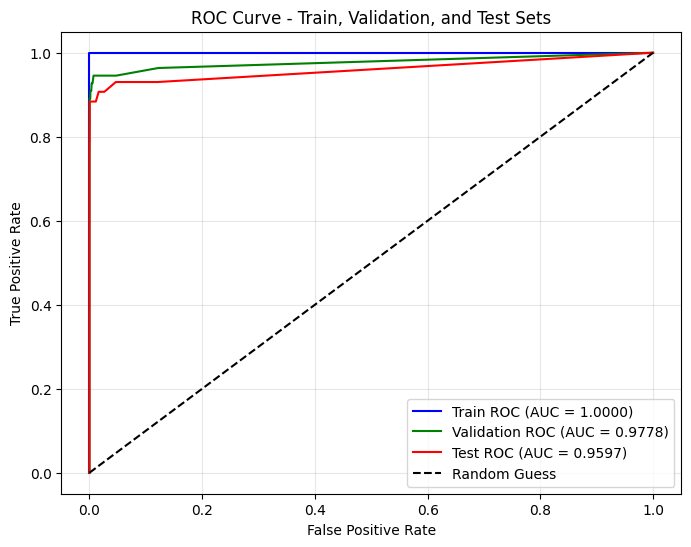

In [14]:
# Curva ROC para os conjuntos de treino, validação e teste
from sklearn.metrics import roc_curve

# Conjunto de treino
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, rf.predict_proba(X_train_resampled)[:, 1])
# Conjunto de validação
fpr_valid, tpr_valid, _ = roc_curve(y_valid, rf.predict_proba(X_valid)[:, 1])
# Conjunto de teste
fpr_test, tpr_test, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plot das curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_auc:.4f})', color='blue')
plt.plot(fpr_valid, tpr_valid, label=f'Validation ROC (AUC = {valid_auc:.4f})', color='green')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Linha de chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train, Validation, and Test Sets')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

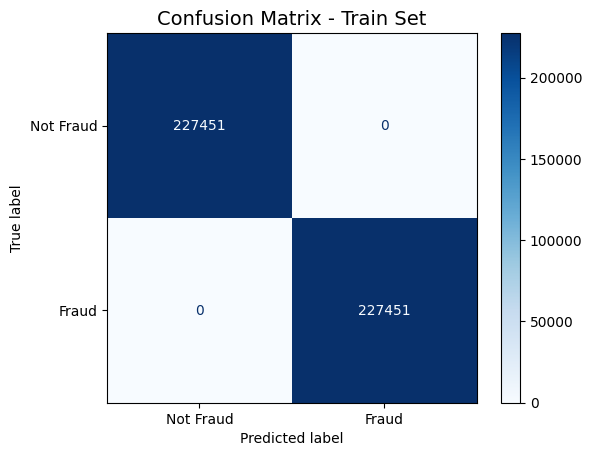

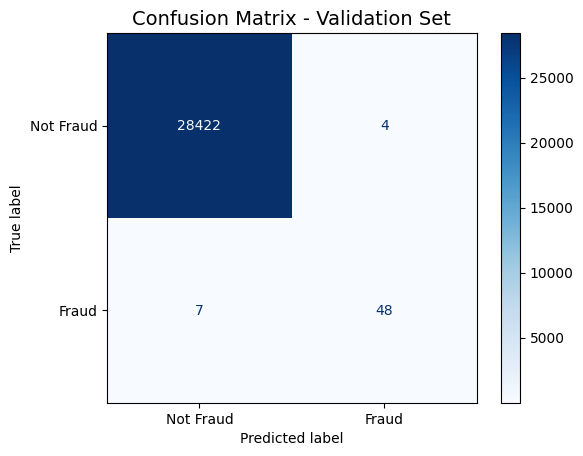

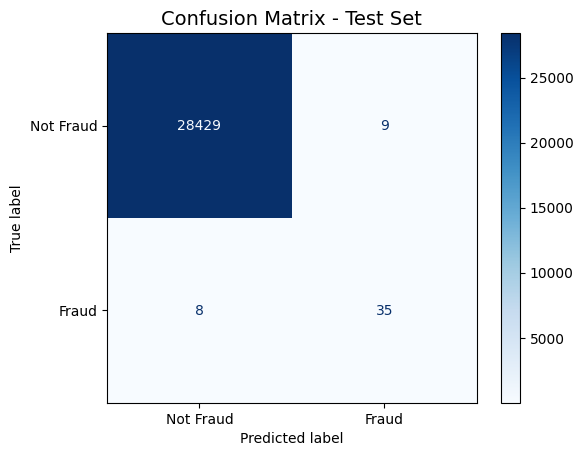

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Previsões para cada conjunto
train_preds = rf.predict(X_train_resampled)
valid_preds = rf.predict(X_valid)
test_preds = rf.predict(X_test)

# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(title, fontsize=14)
    plt.grid(False)
    plt.show()

# Matriz de confusão para o conjunto de treino
plot_confusion_matrix(y_train_resampled, train_preds, title="Confusion Matrix - Train Set")

# Matriz de confusão para o conjunto de validação
plot_confusion_matrix(y_valid, valid_preds, title="Confusion Matrix - Validation Set")

# Matriz de confusão para o conjunto de teste
plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix - Test Set")


---
## Modelo XGBoost

* O XGBoost (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina que usa uma abordagem de boosting para construir árvores de decisão. 
* Ele treina múltiplas árvores de forma sequencial, onde cada nova árvore foca nas previsões dos erros das árvores anteriores, melhorando o desempenho do modelo. 
* O XGBoost aplica técnicas de regularização, como suavização e penalização de complexidade, para reduzir o overfitting e melhorar a generalização. 
* Ele inclui otimizações como sparsidade, paralelismo e estratégias de poda para aumentar a eficiência de treinamento. 
* XGBoost é amplamente usado em tarefas de classificação e regressão, especialmente em problemas complexos e grandes volumes de dados, como a previsão de risco de crédito.

In [16]:
# Configurações
RANDOM_STATE = 2268
MAX_ROUNDS = 100
EARLY_STOP = 50
NUMBER_KFOLDS = 5
VERBOSE_EVAL = 10

# Inicializa o modelo
params = {
    'objective': 'binary:logistic',
    'eta': 0.039,
    'silent': True,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'auc',
    'random_state': RANDOM_STATE
}

# Preparação dos datasets no formato DMatrix para o XGBoost
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)


In [17]:
kf = KFold(n_splits=NUMBER_KFOLDS, random_state=RANDOM_STATE, shuffle=True)
oof_preds = np.zeros(X_train_resampled.shape[0])  # Previsões out-of-fold
test_preds = np.zeros(X_test.shape[0])  # Previsões no conjunto de teste
n_fold = 0

for train_idx, valid_idx in kf.split(X_train_resampled):
    # Divisão dos dados de treino e validação para o fold atual
    train_x, train_y = X_train_resampled.iloc[train_idx], y_train_resampled.iloc[train_idx]
    valid_x, valid_y = X_train_resampled.iloc[valid_idx], y_train_resampled.iloc[valid_idx]
    
    # Criação do DMatrix para o XGBoost
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)
    dtest = xgb.DMatrix(X_test)  # Mantém o conjunto de teste inalterado
    
    # Lista de monitoramento para o treinamento
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    evals_results = {}
    
    # Treinamento do modelo XGBoost
    model = xgb.train(params, 
                      dtrain, 
                      MAX_ROUNDS, 
                      watchlist, 
                      early_stopping_rounds=EARLY_STOP, 
                      evals_result=evals_results, 
                      maximize=True, 
                      verbose_eval=VERBOSE_EVAL)
    
    # Previsões out-of-fold no conjunto de validação
    oof_preds[valid_idx] = model.predict(dvalid, iteration_range=(0, model.best_iteration))
    
    # Previsões acumuladas para o conjunto de teste
    test_preds += model.predict(dtest, iteration_range=(0, model.best_iteration)) / kf.n_splits
    
    # Métrica AUC para o fold atual
    print(f'Fold {n_fold + 1} AUC : {roc_auc_score(valid_y, oof_preds[valid_idx]):.6f}')
    n_fold += 1

# Resultados finais
print(f'Média AUC Out-of-Fold: {roc_auc_score(y_train_resampled, oof_preds):.6f}')

[0]	train-auc:0.92382	valid-auc:0.90704


d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [18:52:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-auc:0.92388	valid-auc:0.90694
[20]	train-auc:0.92559	valid-auc:0.90673
[30]	train-auc:0.92559	valid-auc:0.90676
[40]	train-auc:0.92545	valid-auc:0.90650
[50]	train-auc:0.92547	valid-auc:0.90651
Fold 1 AUC : 0.907039
[0]	train-auc:0.91349	valid-auc:0.94065


d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [18:52:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.96526	valid-auc:0.96469
[10]	train-auc:0.98339	valid-auc:0.98195
[20]	train-auc:0.98537	valid-auc:0.98419
[30]	train-auc:0.98963	valid-auc:0.98869
[40]	train-auc:0.99129	valid-auc:0.99081
[50]	train-auc:0.99188	valid-auc:0.99150
[60]	train-auc:0.99293	valid-auc:0.99265
[70]	train-auc:0.99340	valid-auc:0.99316
[80]	train-auc:0.99396	valid-auc:0.99375
[90]	train-auc:0.99437	valid-auc:0.99417
[99]	train-auc:0.99478	valid-auc:0.99462
Fold 2 AUC : 0.994573


d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [18:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-auc:0.92718	valid-auc:0.88584
[20]	train-auc:0.92702	valid-auc:0.88562
[30]	train-auc:0.94364	valid-auc:0.89303
[40]	train-auc:0.94368	valid-auc:0.89302
[50]	train-auc:0.94866	valid-auc:0.89194
[60]	train-auc:0.95710	valid-auc:0.89131
[70]	train-auc:0.95741	valid-auc:0.89119
[79]	train-auc:0.96969	valid-auc:0.88677
Fold 3 AUC : 0.893033
[0]	train-auc:0.92181	valid-auc:0.91466


d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [18:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-auc:0.92185	valid-auc:0.91463
[20]	train-auc:0.92185	valid-auc:0.91464
[30]	train-auc:0.93389	valid-auc:0.91377
[40]	train-auc:0.93368	valid-auc:0.92204
[50]	train-auc:0.93877	valid-auc:0.92117
[60]	train-auc:0.95814	valid-auc:0.92674
[70]	train-auc:0.95856	valid-auc:0.92667
[80]	train-auc:0.96615	valid-auc:0.94814
[90]	train-auc:0.96787	valid-auc:0.94761
[99]	train-auc:0.96775	valid-auc:0.94730
Fold 4 AUC : 0.948049
[0]	train-auc:0.91531	valid-auc:0.94019


d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\Ferramentas\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [18:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.96013	valid-auc:0.96016
[10]	train-auc:0.98317	valid-auc:0.98396
[20]	train-auc:0.98529	valid-auc:0.98586
[30]	train-auc:0.99032	valid-auc:0.99071
[40]	train-auc:0.99124	valid-auc:0.99154
[50]	train-auc:0.99220	valid-auc:0.99247
[60]	train-auc:0.99300	valid-auc:0.99323
[70]	train-auc:0.99356	valid-auc:0.99373
[80]	train-auc:0.99394	valid-auc:0.99409
[90]	train-auc:0.99443	valid-auc:0.99454
[99]	train-auc:0.99481	valid-auc:0.99488
Fold 5 AUC : 0.994853
Média AUC Out-of-Fold: 0.994680


---
## Feature Importance


* A feature importance (importância das variáveis) serve para identificar quais características (features) têm o maior impacto na previsão de um modelo de machine learning. 
* Ela ajuda a entender a contribuição relativa de cada feature no desempenho do modelo e a tomar decisões informadas sobre quais features são mais relevantes.

ROC-AUC score no conjunto de teste: 0.970427


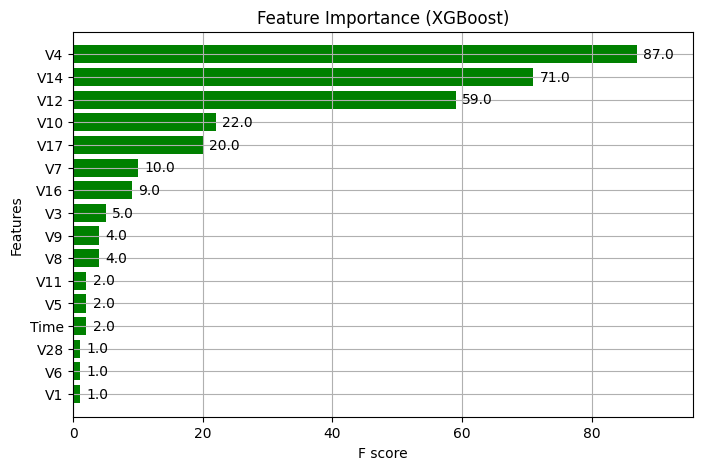

In [18]:
# Predições no conjunto de teste
dtest = xgb.DMatrix(X_test)
preds = model.predict(dtest, iteration_range=(0, model.best_iteration))

# Calcular o AUC para o conjunto de teste
xgb_auc = roc_auc_score(y_test, preds)
print(f"ROC-AUC score no conjunto de teste: {xgb_auc:.6f}")

# Exibir a importância das features
fig, ax = plt.subplots(figsize=(8, 5))
xgb.plot_importance(model, 
                    height=0.8, 
                    title="Feature Importance (XGBoost)", 
                    ax=ax, 
                    color="green")
plt.show()


ROC-AUC score no conjunto de teste: 0.906819


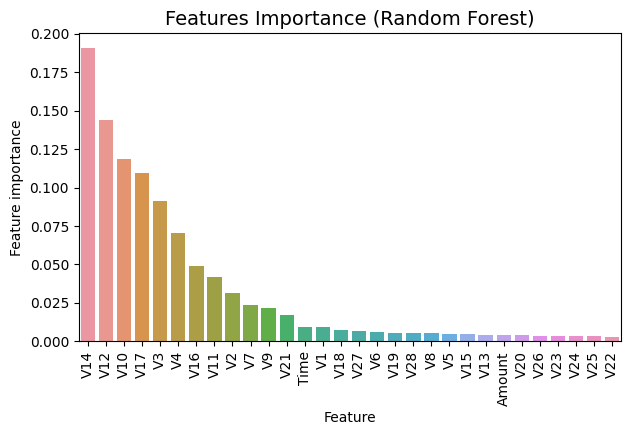

In [19]:
# Predições no conjunto de teste
y_pred = rf.predict(X_test)

# Calcular o AUC para o conjunto de teste
rf_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC score no conjunto de teste: {rf_auc:.6f}")

# Exibir a importância das features
# Usando as colunas de 'X_train' para identificar as features
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize=(7, 4))
plt.title('Features Importance (Random Forest)', fontsize=14)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

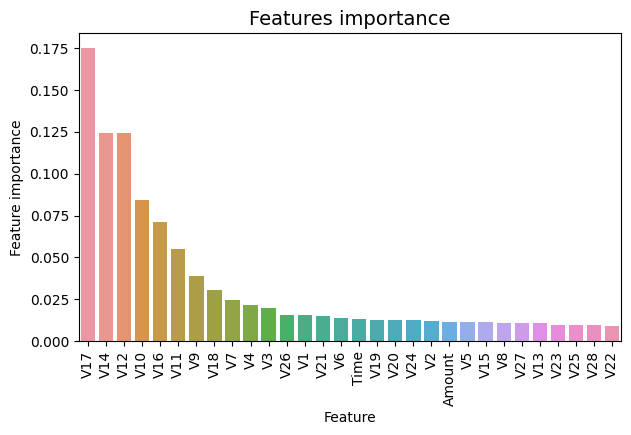

In [19]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

---
## Comparação dos modelos XGBoost e Random Forest

In [20]:
# Tabela com os resultados
results_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'ROC-AUC Score': [xgb_auc, rf_auc]
})

print(results_df)


           Model  ROC-AUC Score
0        XGBoost       0.970427
1  Random Forest       0.906819


---
## Conclusão:
* O XGBoost obteve um ROC-AUC Score de 0.9704, indicando um desempenho excelente na separação entre as classes de risco de crédito. Esse resultado demonstra que o modelo é altamente eficaz em identificar casos de alto risco e em minimizar os falsos positivos, mesmo em cenários com dados complexos e desbalanceados.
* O Random Forest apresentou um ROC-AUC Score de 0.9068, o que ainda é um resultado muito bom, mas inferior ao desempenho do XGBoost. Isso sugere que o Random Forest pode ter menos precisão e capacidade de generalização em comparação ao XGBoost neste caso específico.
* essa forma, o XGBoost demonstrou ser a opção mais eficaz para tarefas de previsão de risco de crédito neste conjunto de dados. O Random Forest, por outro lado, permanece uma alternativa viável em situações onde a interpretação dos resultados e a robustez são fatores prioritários. A escolha entre os dois modelos dependerá das necessidades específicas do problema e das restrições de implementação.